In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, LSTM, Flatten, InputLayer, Conv1D, MaxPooling1D
from keras.layers import Dropout, BatchNormalization, Bidirectional
from sklearn.model_selection import train_test_split  
from tensorflow.keras.utils import plot_model,to_categorical
import time

import pandas as pd  
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint

import random as rn
import tensorflow as tf

In [3]:
X = np.load("X_mfcc_jpt.npy")
y = np.load("y_mfcc_jpt.npy")
X = X.reshape((X.shape[0],1,X.shape[1]))
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [4]:
print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(697, 1, 40) (175, 1, 40)
(697,) (175,)


In [5]:
def create_model():  
    model = Sequential()
    model.add(BatchNormalization(axis=-1, input_shape=(train_x.shape[1],
               train_x.shape[2]))) 
    model.add(LSTM(64, return_sequences=(True)))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(256))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
              
    # model compilation
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])  
    return model

In [6]:
checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')

In [8]:
model = create_model()
hist = model.fit(train_x, train_y, epochs=100,callbacks=[checkpoint],steps_per_epoch =5, validation_split=0.2)  

Epoch 1/100
5/5 [==============================] - 3s 153ms/step - loss: 0.6891 - accuracy: 0.5925 - val_loss: 0.6891 - val_accuracy: 0.5571

Epoch 00001: val_accuracy improved from -inf to 0.55714, saving model to model.h5
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6685 - accuracy: 0.6607 - val_loss: 0.6849 - val_accuracy: 0.5143

Epoch 00002: val_accuracy did not improve from 0.55714
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6288 - accuracy: 0.6481 - val_loss: 0.6907 - val_accuracy: 0.4857

Epoch 00003: val_accuracy did not improve from 0.55714
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 0.5984 - accuracy: 0.6553 - val_loss: 0.6980 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.55714
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.5853 - accuracy: 0.6697 - val_loss: 0.6929 - val_accuracy: 0.5286

Epoch 00005: val_accuracy did not improve from 

5/5 [==============================] - 0s 15ms/step - loss: 0.1097 - accuracy: 0.9533 - val_loss: 1.4231 - val_accuracy: 0.6571

Epoch 00041: val_accuracy did not improve from 0.68571
Epoch 42/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0918 - accuracy: 0.9677 - val_loss: 1.4789 - val_accuracy: 0.6286

Epoch 00042: val_accuracy did not improve from 0.68571
Epoch 43/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0846 - accuracy: 0.9659 - val_loss: 1.5239 - val_accuracy: 0.6714

Epoch 00043: val_accuracy did not improve from 0.68571
Epoch 44/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0789 - accuracy: 0.9749 - val_loss: 1.5359 - val_accuracy: 0.6571

Epoch 00044: val_accuracy did not improve from 0.68571
Epoch 45/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0537 - accuracy: 0.9892 - val_loss: 1.6321 - val_accuracy: 0.6714

Epoch 00045: val_accuracy did not improve from 0.68571
Epoch 46/100
5/5 [==========


Epoch 00082: val_accuracy did not improve from 0.70714
Epoch 83/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 3.1099 - val_accuracy: 0.6571

Epoch 00083: val_accuracy did not improve from 0.70714
Epoch 84/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0346 - accuracy: 0.9874 - val_loss: 3.2633 - val_accuracy: 0.6214

Epoch 00084: val_accuracy did not improve from 0.70714
Epoch 85/100
5/5 [==============================] - ETA: 0s - loss: 0.0376 - accuracy: 0.98 - 0s 12ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 3.0859 - val_accuracy: 0.6571

Epoch 00085: val_accuracy did not improve from 0.70714
Epoch 86/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.1135 - val_accuracy: 0.6500

Epoch 00086: val_accuracy did not improve from 0.70714
Epoch 87/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 3.1

Accuracy: 68.00%
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


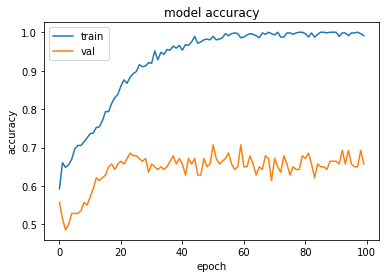

In [9]:
# Final evaluation of the model
scores = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

print(hist.history.keys())
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

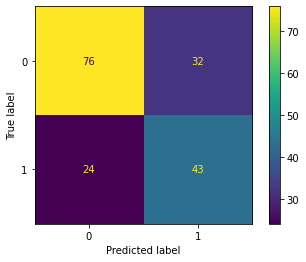

In [16]:
y_pred = model.predict(test_x)
for i in range(0,len(y_pred)) :
    selisih_to_0 = abs(0-y_pred[i][0])
    selisih_to_1 = abs(1-y_pred[i][0])
    if(min(selisih_to_0, selisih_to_1) == selisih_to_0):
        y_pred[i][0] = 0
    else:
        y_pred[i][0] = 1
cm = confusion_matrix(test_y, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [20]:
tp, tn = cm[0, 0], cm[1, 1]
fn, fp = cm[1, 0], cm[0, 1]
    
sensitivity = tp / (tp + fn)
specificity = tn / (fp + tn)
    
uar = (specificity + sensitivity)/2.0
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(uar)
print(accuracy)

0.6666666666666667
0.68
